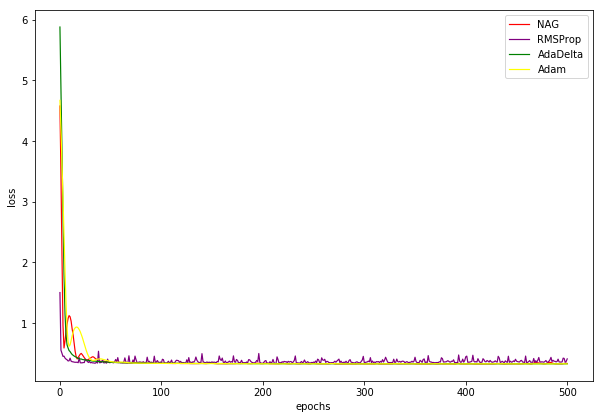

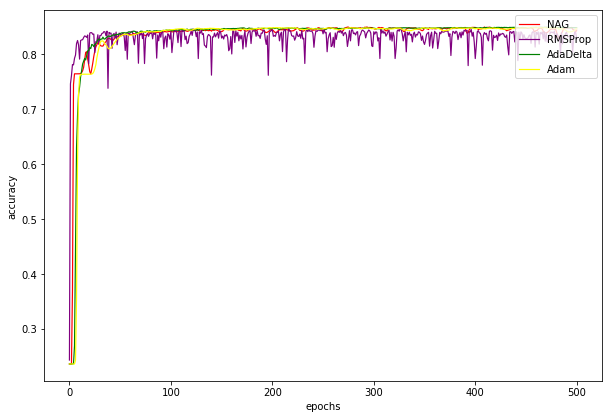

In [27]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix, hstack  


# calculate the sigmoid function
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

def sign(inX,threshold):
    if inX>=threshold:
        return 1
    else:
        return 0

def NAG(train_x, train_y,text_x,text_y,gamma =0.9,threshold =0.5,rate =0.1,size=64,epoch=500):
    gradients = np.zeros((train_x.shape[1],1))
    weights = np.random.rand(train_x.shape[1],1)
    momentum = np.zeros((train_x.shape[1],1))
    
    epoch_set = []
    l_nag = []
    a_nag = []


    for k in range(epoch+1):
        batch_step = random.randint(0,train_x.shape[0]-size-1)
        for i in range(batch_step,batch_step+size):
            gradients = gradients+((sigmoid(np.dot(train_x[i],(weights-gamma*momentum)))-train_y[i])*train_x[i]).reshape((train_x.shape[1],1))
        gradients = gradients/size
        momentum = gamma*momentum+rate*gradients
        weights = weights - momentum
        if(k>0)or(k%100==0):
            epoch_set.append(k)
            loss = 0
            res = 0
            for j in range(test_x.shape[0]):
                h = sigmoid(np.dot(test_x[j],(weights-gamma*momentum)))
                loss = loss+(test_y[j]*np.log(h)+(1-test_y[j])*np.log(1-h))
                if sign(h,threshold) == test_y[j]:
                    res = res+1
            accuracy = res/test_x.shape[0]
            loss = -loss/test_x.shape[0]
            a_nag.append(accuracy)
            l_nag.append(loss)
    return a_nag,l_nag,epoch_set


def RMSProp(train_x,train_y,test_x,test_y,gamma =0.9,epsilon=1e-10,threshold=0.5,rate=0.1,size=64,epoch=500):
    gradients = np.zeros((train_x.shape[1],1))
    weights = np.random.rand(train_x.shape[1],1)
    g = np.zeros((train_x.shape[1],1))
    epoch_set =[]
    l_rmsp = []
    a_rmsp =[]
    for k in range(epoch+1):
        batch_step = random.randint(0,train_x.shape[0]-size-1)
        for i in range(batch_step,batch_step+size):
            gradients = gradients+((sigmoid(np.dot(train_x[i],weights))-train_y[i])*train_x[i]).reshape((train_x.shape[1],1))
        gradients = gradients/size
        g = gamma*g+np.multiply((1-gamma)*gradients,gradients)
        weights = weights - np.multiply(rate/(np.sqrt(g+epsilon)),gradients)
        if(k>0)or(k%100==0):
            epoch_set.append(k)
            loss = 0
            res = 0
            for j in range(test_x.shape[0]):
                h = sigmoid(np.dot(test_x[j],weights))
                loss = loss+(test_y[j]*np.log(h)+(1-test_y[j])*np.log(1-h))
                if sign(h,threshold) == test_y[j]:
                    res = res+1
            accuracy = res/test_x.shape[0]
            loss = -loss/test_x.shape[0]
            a_rmsp.append(accuracy)
            l_rmsp.append(loss)
    return a_rmsp,l_rmsp

def AdaDelta(train_x,train_y,test_x,test_y,gamma=0.9,epsilon=1e-10,threshold=0.5,dx=0.001,size=64,epoch=500):
    gradients = np.zeros((train_x.shape[1],1))
    weights = np.random.rand(train_x.shape[1],1)
    g = np.zeros((train_x.shape[1],1))
    epoch_set =[]
    l_adad = []
    a_adad =[]
    for k in range(epoch+1):
        batch_step = random.randint(0,train_x.shape[0]-size-1)
        for i in range(batch_step,batch_step+size):
            gradients = gradients+((sigmoid(np.dot(train_x[i],weights))-train_y[i])*train_x[i]).reshape((train_x.shape[1],1))
        gradients = gradients/size
        g = gamma*g+np.multiply((1-gamma)*gradients,gradients)
        dw = -np.multiply((np.sqrt(dx+epsilon))/(np.sqrt(g+epsilon)),gradients)
        weights = weights +dw
        dx = gamma*dx+np.multiply((1-gamma)*dw,dw)
        if(k>0)or(k%100==0):
            epoch_set.append(k)
            loss = 0
            res = 0
            for j in range(test_x.shape[0]):
                h = sigmoid(np.dot(test_x[j],weights))
                loss = loss+(test_y[j]*np.log(h)+(1-test_y[j])*np.log(1-h))
                if sign(h,threshold) == test_y[j]:
                    res = res+1
            accuracy = res/test_x.shape[0]
            loss = -loss/test_x.shape[0]
            a_adad.append(accuracy)
            l_adad.append(loss)
    return a_adad,l_adad

def Adam(train_x,train_y,test_x,test_y,beta=0.9,gamma=0.999,epsilon=1e-8,threshold=0.5,rate=0.01,size=64,epoch=500):
    gradients = np.zeros((train_x.shape[1],1))
    weights = np.random.rand(train_x.shape[1],1)
    g = np.zeros((train_x.shape[1],1))
    moments = np.zeros((train_x.shape[1],1))
    epoch_set =[]
    l_adam = []
    a_adam =[]
    for k in range(epoch+1):
        batch_step = random.randint(0,train_x.shape[0]-size-1)
        for i in range(batch_step,batch_step+size):
            gradients = gradients+((sigmoid(np.dot(train_x[i],weights))-train_y[i])*train_x[i]).reshape((train_x.shape[1],1))
        gradients = gradients/size
        moments = beta*moments+(1-beta)*gradients
        g = gamma*g+np.multiply((1-gamma)*gradients,gradients)
        alpha = rate
        dw = -alpha*moments/(np.sqrt(g+epsilon))
        weights = weights +dw
        if(k>0)or(k%100==0):
            epoch_set.append(k)
            loss = 0
            res = 0
            for j in range(test_x.shape[0]):
                h = sigmoid(np.dot(test_x[j],weights))
                loss = loss+(test_y[j]*np.log(h)+(1-test_y[j])*np.log(1-h))
                if sign(h,threshold) == test_y[j]:
                    res = res+1
            accuracy = res/test_x.shape[0]
            loss = -loss/test_x.shape[0]
            a_adam.append(accuracy)
            l_adam.append(loss)
    return a_adam,l_adam
    

def draw_plot_loss(epoch_set,l_nag,l_rmsp,l_adad,l_adam):
    plt.figure(figsize=(10,15))
    plt.subplot(211)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(epoch_set,l_nag,color='red',label='NAG',linewidth=1.2,linestyle='-')
    plt.plot(epoch_set,l_rmsp,color='purple',label='RMSProp',linewidth=1.2,linestyle='-')
    plt.plot(epoch_set,l_adad,color='green',label='AdaDelta',linewidth=1.2,linestyle='-')
    plt.plot(epoch_set,l_adam,color='yellow',label='Adam',linewidth=1.2,linestyle='-')
    plt.legend(loc='upper right')
    plt.show()
    
def draw_plot_accuracy(epoch_set,a_nag,a_rmsp,a_adad,a_adam):
    plt.figure(figsize=(10,15))
    plt.subplot(211)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(epoch_set, a_nag,color='red',label='NAG',linewidth=1.2,linestyle='-')
    plt.plot(epoch_set, a_rmsp,color='purple',label='RMSProp',linewidth=1.2,linestyle='-')
    plt.plot(epoch_set, a_adad,color='green',label='AdaDelta',linewidth=1.2,linestyle='-')
    plt.plot(epoch_set, a_adam,color='yellow',label='Adam',linewidth=1.2,linestyle='-')
    plt.legend(loc='upper right')
    plt.show()
    
def get_data(file,n_features=None):
    if n_features ==None:
        inputs,labels = datasets.load_svmlight_file(file)
    else:
        inputs,labels = datasets.load_svmlight_file(file,n_features=n_features)
    
    one = np.ones((inputs.shape[0],1))
    inputs = hstack([inputs,csr_matrix(one)]).toarray()
    labels = np.array(labels).reshape(inputs.shape[0],1)
    labels[labels==-1]=0
    return inputs,labels

if __name__ == "__main__":
    train_x,train_y = get_data('a9a')
    test_x,test_y = get_data('a9a.t',train_x.shape[1]-1)

    a_nag,l_nag,epoch_set=NAG(train_x,train_y,test_x,test_y)
    a_rmsp,l_rmsp = RMSProp(train_x,train_y,test_x,test_y)
    a_adad,l_adad = AdaDelta(train_x,train_y,test_x,test_y)
    a_adam,l_adam = Adam(train_x,train_y,test_x,test_y)

    draw_plot_loss(epoch_set,l_nag,l_rmsp,l_adad,l_adam)
    draw_plot_accuracy(epoch_set,a_nag,a_rmsp,a_adad,a_adam)
    